# Three variable Monte-Carlo exponential function integral


In [15]:
# TODO:
# * beta is inaccurate & mass-dep: testing exponential mass function
# * formula is incorrect: 
# - testing r = 0 case
# - testing sigma_zeta = 0 => 2 observable case
# * numerical inaccuracy of PDF
# - testing 1D pdf (2 observables)
# <Sigma | lambda> = … 
# integration over lambda


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.integrate as integrate
from tqdm import tqdm,trange
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
print(np.log(1E13))

29.933606208922594


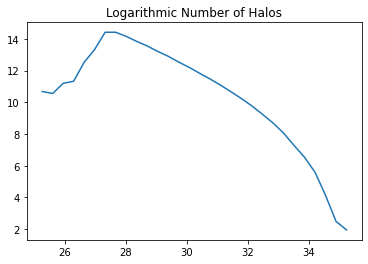

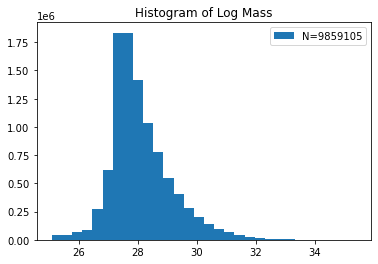

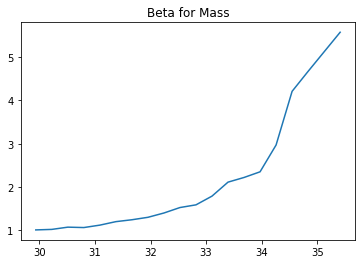

In [18]:
from mass_function import MassFunction

mf = MassFunction(kind="nbody")

# Richness scaling relations


In [19]:
from scaling_relation import ScalingRelation

sr = ScalingRelation()

self.alpha_lam=0.939, self.pi_lam=-27.547425726070088, self.scatter_lam=0.36
self.alpha_SZ=1.519, self.pi_SZ=-50.085787147359696, self.scatter_SZ=0.152
self.alpha_Mwl=1, self.pi_Mwl=0, self.scatter_Mwl=0.5


# MonteCarlo

First, Monte Carlo from the covariance matrix and the mean. How does this work?

Second, define a narrow richness bin to mimic the distribution of halo mass given richness. The expectation value given no correlation should be
$$\frac{\lambda-\pi_{\lambda}}{\alpha_{\lambda}}$$

But the downward correction is
$$-(\frac{\sigma_\lambda}{\alpha})^2 \beta$$

Third,


In [20]:
color_list = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:cyan', "gold"]


Total number of massive halos: 584257


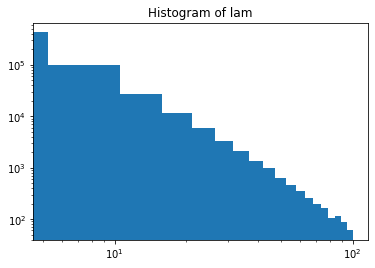

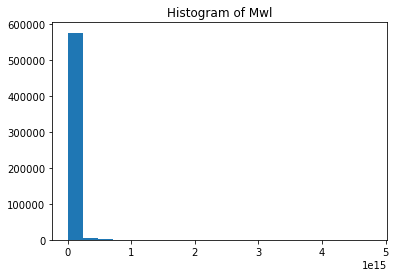

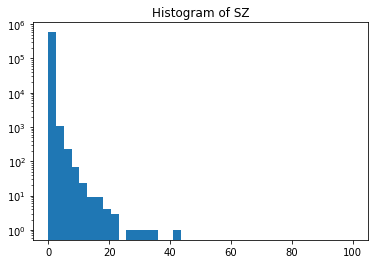

Number of halos with SZ < 4: 583676
Number of halos with SZ > 4: 581


In [21]:
from monte_carlo_observable import MonteCarloObservables

mco = MonteCarloObservables(mass_function=mf,
                            scaling_relation=sr,
                            r=0)

In [22]:
# predicted_lnsig = [None] * len(mco.lnlam)
# for i in trange(len(mco.lnlam)):
#     predicted_lnsig[i] = mco.theory_calculate_mean_mwl_given_lam_sz(mco.lnlam[i],mco.lnSZ[i],correction=True)

# predicted_lnsig = np.array(predicted_lnsig)
# for_csv = {'lnlam':mco.lnlam,'lnsigma':mco.lnMwl,'lnzeta':mco.lnSZ,'predicted_lnsig':predicted_lnsig}
# for_csv_df = pd.DataFrame(data=for_csv)
# for_csv_df.to_csv("../data/csv_for_tianyu")

In [26]:
kwargs, lam_list, sz_list, diff_list, count_list = mco.verify_theory_mean_mwl_given_lam_sz_bin(lam1=10,
                                            lam2=100,
                                            sz_threshold=4,
                                            bin_numbers=[2,5])


All halos within lam1 and lam2: 59686
Statistics for 2 bins
count_list[i]=array([[58029.,    75.],
       [ 1297.,   285.]])
diff_list[i]=array([[-9.10796912e-05, -2.28867421e-02],
       [ 4.22001041e-03, -1.35470643e-02]])
---------------------------------------
All halos within lam1 and lam2: 59686
Statistics for 5 bins
count_list[i]=array([[5.0638e+04, 1.0000e+00],
       [6.3650e+03, 3.3000e+01],
       [1.6160e+03, 8.6000e+01],
       [5.1000e+02, 1.3000e+02],
       [1.9700e+02, 1.1000e+02]])
diff_list[i]=array([[ 0.00056592,  0.17670977],
       [-0.00204683, -0.07631887],
       [-0.00473134, -0.0527511 ],
       [-0.02455609, -0.01751152],
       [-0.00564213,  0.03251641]])
---------------------------------------


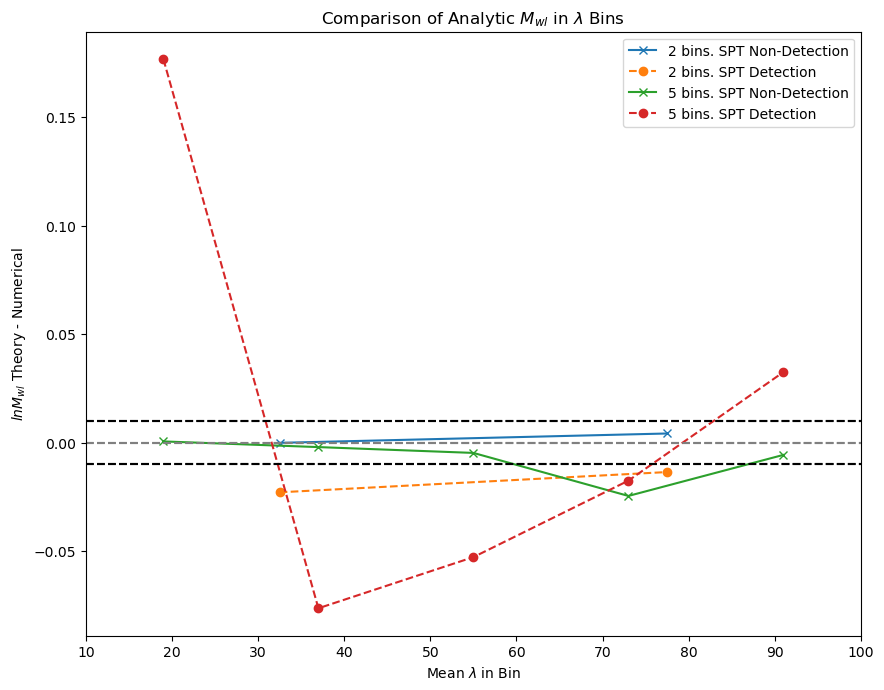

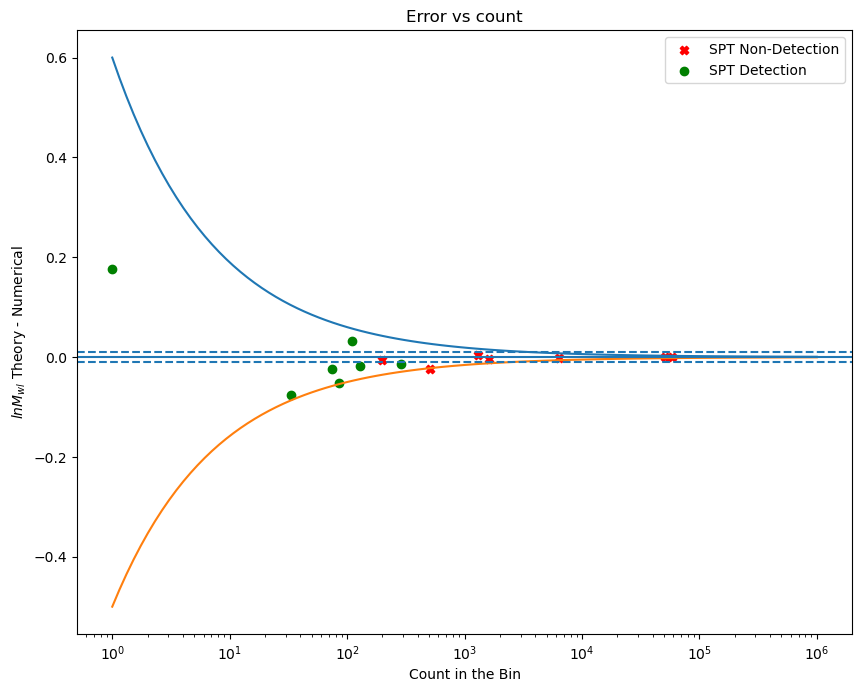

In [27]:
mco.plot_diff_by_bin_numbers(lam_list,sz_list,diff_list,count_list, **kwargs)